In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.linear_model import LinearRegression
from tabulate import tabulate
from IPython.display import display

warnings.filterwarnings('ignore')

In [2]:
# calculating_statistical_moments function
def calculate_statistical_moments(data, top_n=3):  # Consider top 3 features only
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for the top n features in the dataset.

    Parameters:
    - data (DataFrame): Input data containing features.
    - top_n (int): Number of top features to consider. Default is 3.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each of the top n features.
    """
    top_columns = data.mean().abs().nlargest(top_n).index
    moments = {
        'Mean': data[top_columns].mean(),
        'Median': data[top_columns].median(),
        'Standard Deviation': data[top_columns].std(),
        'Skewness': data[top_columns].skew(),
        'Kurtosis': data[top_columns].kurtosis()
    }
    return pd.DataFrame(moments)


In [3]:
# Loading the dataset
Customers_data = pd.read_csv('Mall_Customers.csv')
Customers_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data = pd.DataFrame(Customers_data)
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.shape

(200, 5)

In [8]:
# Calling the function to calculate statistical moments
statistical_moments_df = calculate_statistical_moments(Customers_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
display(statistical_moments_df)

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Annual Income (k$),60.56,61.5,26.264721,0.321843,-0.098487
Spending Score (1-100),50.20,50.0,25.823522,-0.047220,-0.826629
Age,38.85,36.0,13.969007,0.485569,-0.671573


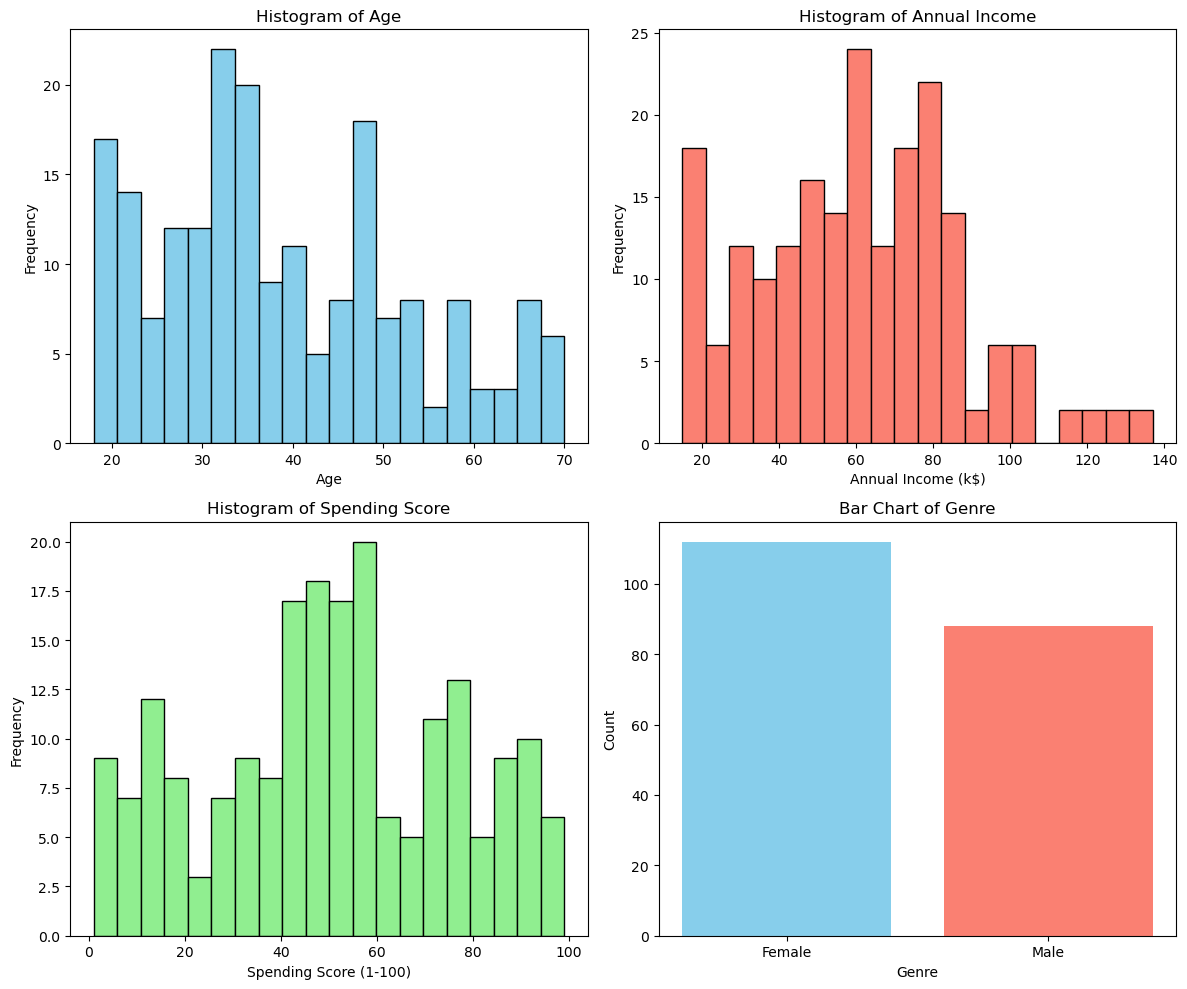

In [9]:
# Creating a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for Age
axs[0, 0].hist(Customers_data['Age'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Histogram of Age')

# Histogram for Annual Income
axs[0, 1].hist(Customers_data['Annual Income (k$)'], bins=20, color='salmon', edgecolor='black')
axs[0, 1].set_xlabel('Annual Income (k$)')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Annual Income')

# Histogram for Spending Score
axs[1, 0].hist(Customers_data['Spending Score (1-100)'], bins=20, color='lightgreen', edgecolor='black')
axs[1, 0].set_xlabel('Spending Score (1-100)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of Spending Score')

# Bar chart for Genre
genre_counts = Customers_data['Genre'].value_counts()
axs[1, 1].bar(genre_counts.index, genre_counts.values, color=['skyblue', 'salmon'])
axs[1, 1].set_xlabel('Genre')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Bar Chart of Genre')


plt.tight_layout()

plt.show()


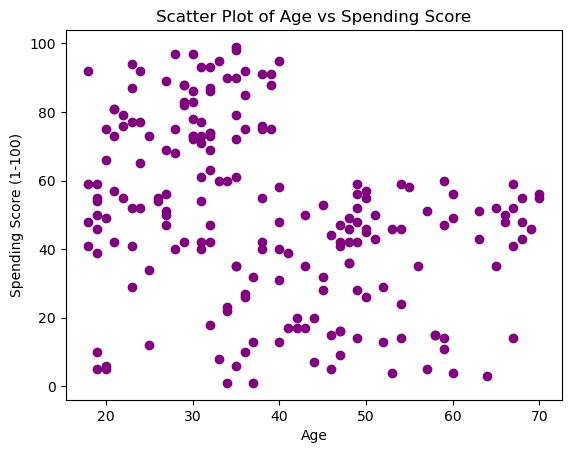

In [10]:
# Scatter plot of spending score vs age
plt.scatter(Customers_data['Age'], Customers_data['Spending Score (1-100)'], color='purple')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Age vs Spending Score')
plt.show()

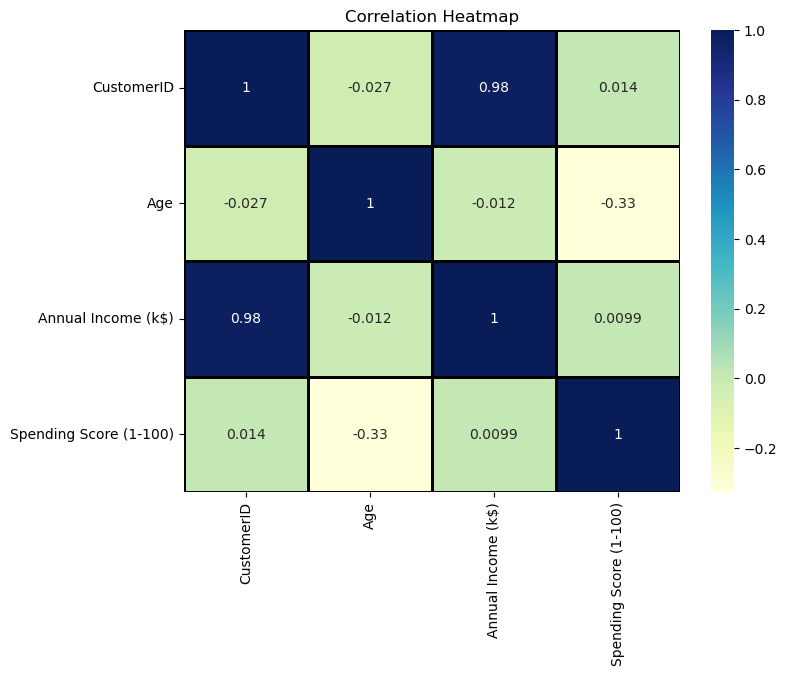

In [11]:
# Selecting numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
corr = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()


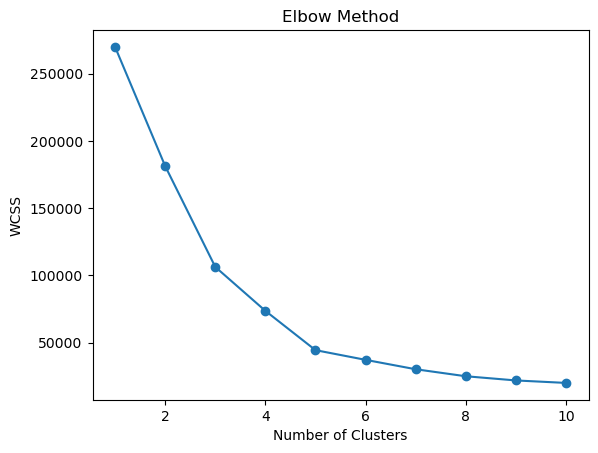

In [12]:
# Selecting features for clustering
X = Customers_data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Choosing the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


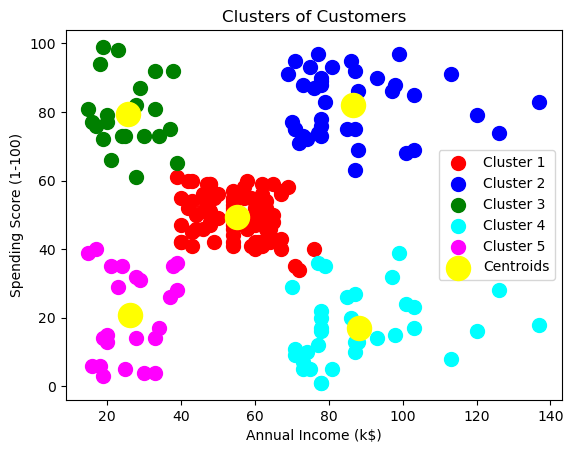

In [13]:
# Fit k-means with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


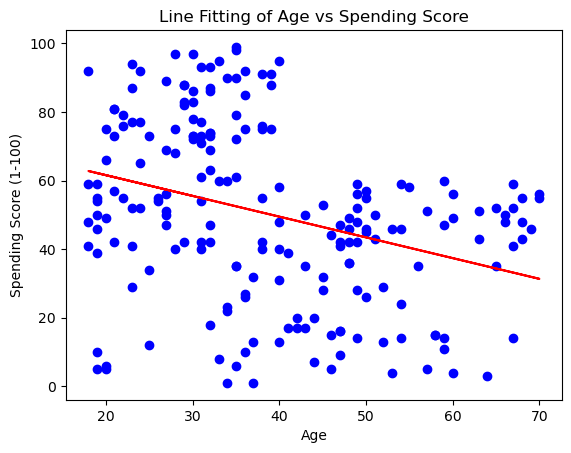

In [14]:
# Selecting features for linear regression
X = Customers_data[['Age']]
y = Customers_data['Spending Score (1-100)']

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot the line
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Line Fitting of Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


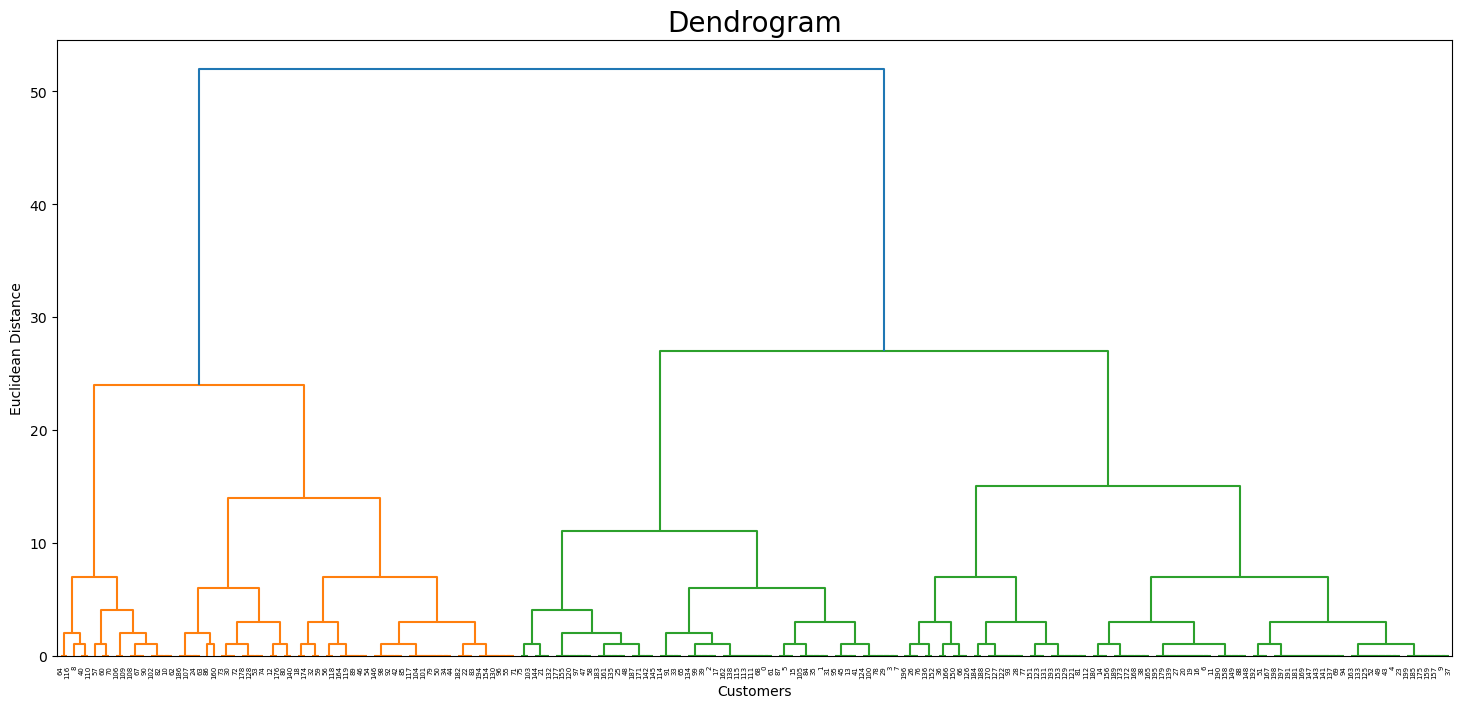

In [15]:
# Hierarchical clustering
plt.figure(figsize=(18, 8))

# Generate the dendrogram using complete linkage method
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')

plt.show()